# Context : 

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

# Objective: 
Analyze in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves.

# Column Profiling:

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

In [487]:
# Genral EDA libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [488]:
# Import Libraries for Model Building


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Metrics

from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 

# LR using Statsmodel library OLS

import statsmodels.api as sm



# For VIF Score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [489]:
data = pd.read_csv("Jamboree_Admission.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


## 1. EDA

In [490]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [491]:
data.shape

(500, 9)

In [492]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [493]:
# Trimming any extra spaces in column name from start or end positions
data.columns = [i.strip() for i in data.columns]
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

### 1.1 Null value Check and Duplicate Value Check

In [494]:
# Null value Check
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [495]:
# Check for duplicates
data.duplicated().sum()

0

### 1.2 Unique value check 

In [496]:
for i in data.columns : 
    print(f"Column: {i}  Unique values: {data[i].nunique()}" )

Column: Serial No.  Unique values: 500
Column: GRE Score  Unique values: 49
Column: TOEFL Score  Unique values: 29
Column: University Rating  Unique values: 5
Column: SOP  Unique values: 9
Column: LOR  Unique values: 9
Column: CGPA  Unique values: 184
Column: Research  Unique values: 2
Column: Chance of Admit  Unique values: 61


In [497]:
data['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [498]:
data['SOP'].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

In [499]:
data['LOR'].value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64

In [500]:
data['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

__NOTE : Research , LOR , SOP and University Rating columns are having numeric categorical values__

### 1.3 Basic Statistical Details

In [501]:
data_stats = data.describe()
data_stats

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [502]:
data_stats.loc['IQR',:] = data_stats.loc['75%',:] - data_stats.loc['25%',:]
data_stats.loc['UW',:] = data_stats.loc['75%',:] + 1.5 * data_stats.loc['IQR',:] # Upper wisker
data_stats.loc['LW',:] = data_stats.loc['25%',:] - 1.5 * data_stats.loc['IQR',:] # Lower Wisker

In [503]:
data_stats

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000
IQR,249.500000,17.000000,9.000000,2.000000,1.500000,1.00000,0.912500,1.000000,0.19000
UW,749.500000,350.500000,125.500000,7.000000,6.250000,5.50000,10.408750,2.500000,1.10500


### 1.4 Univariate  Analysis

In [504]:
cat_col = ['University Rating', 'SOP', 'LOR', 'Research']
num_col = ['GRE Score', 'TOEFL Score', 'CGPA']

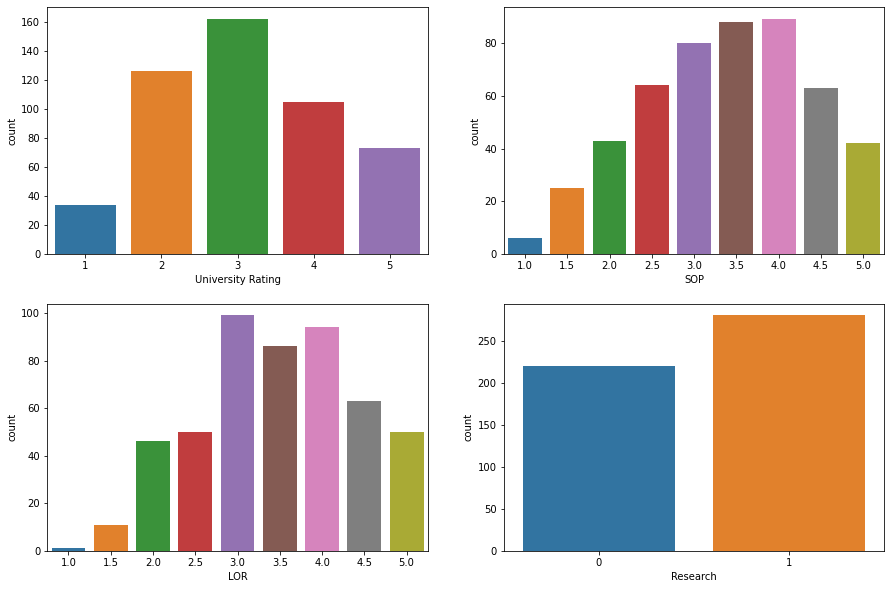

In [505]:
# countplots for categorical variables

cols, rows = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

index = 0
for i in range(rows):
    for j in range(cols):
        sns.countplot(x=data[cat_col[index]], ax=axs[i, j])
        index+=1 
        
plt.show()

### 1.5 Bivariate  Analysis

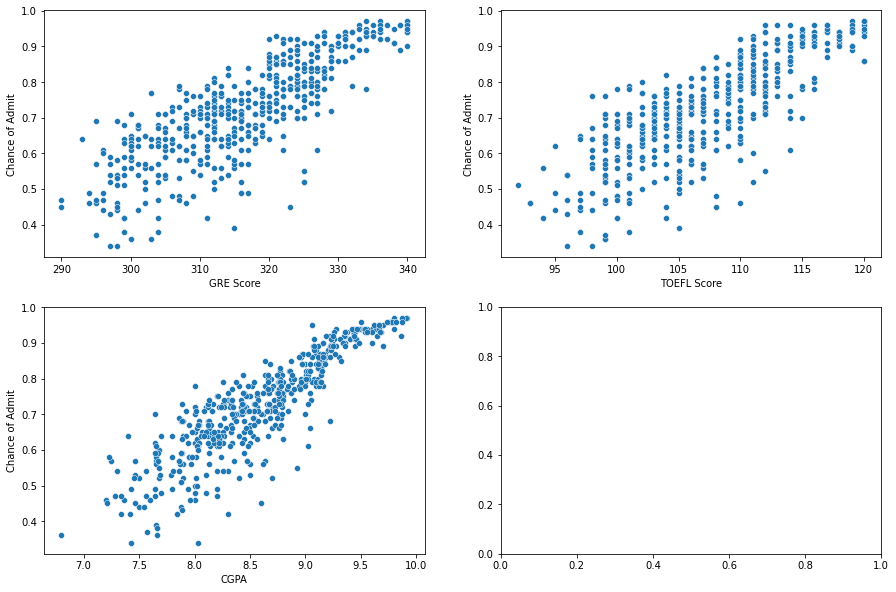

In [506]:
cols, rows = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

index = 0
for i in range(rows):
    for j in range(cols):
        sns.scatterplot(x=data[num_col[index]], y = data['Chance of Admit'], ax=axs[i, j])
        index+=1 
        if index == 3: 
            break
    
        
        
plt.show()

###  1.6 Outlier : Box Plot

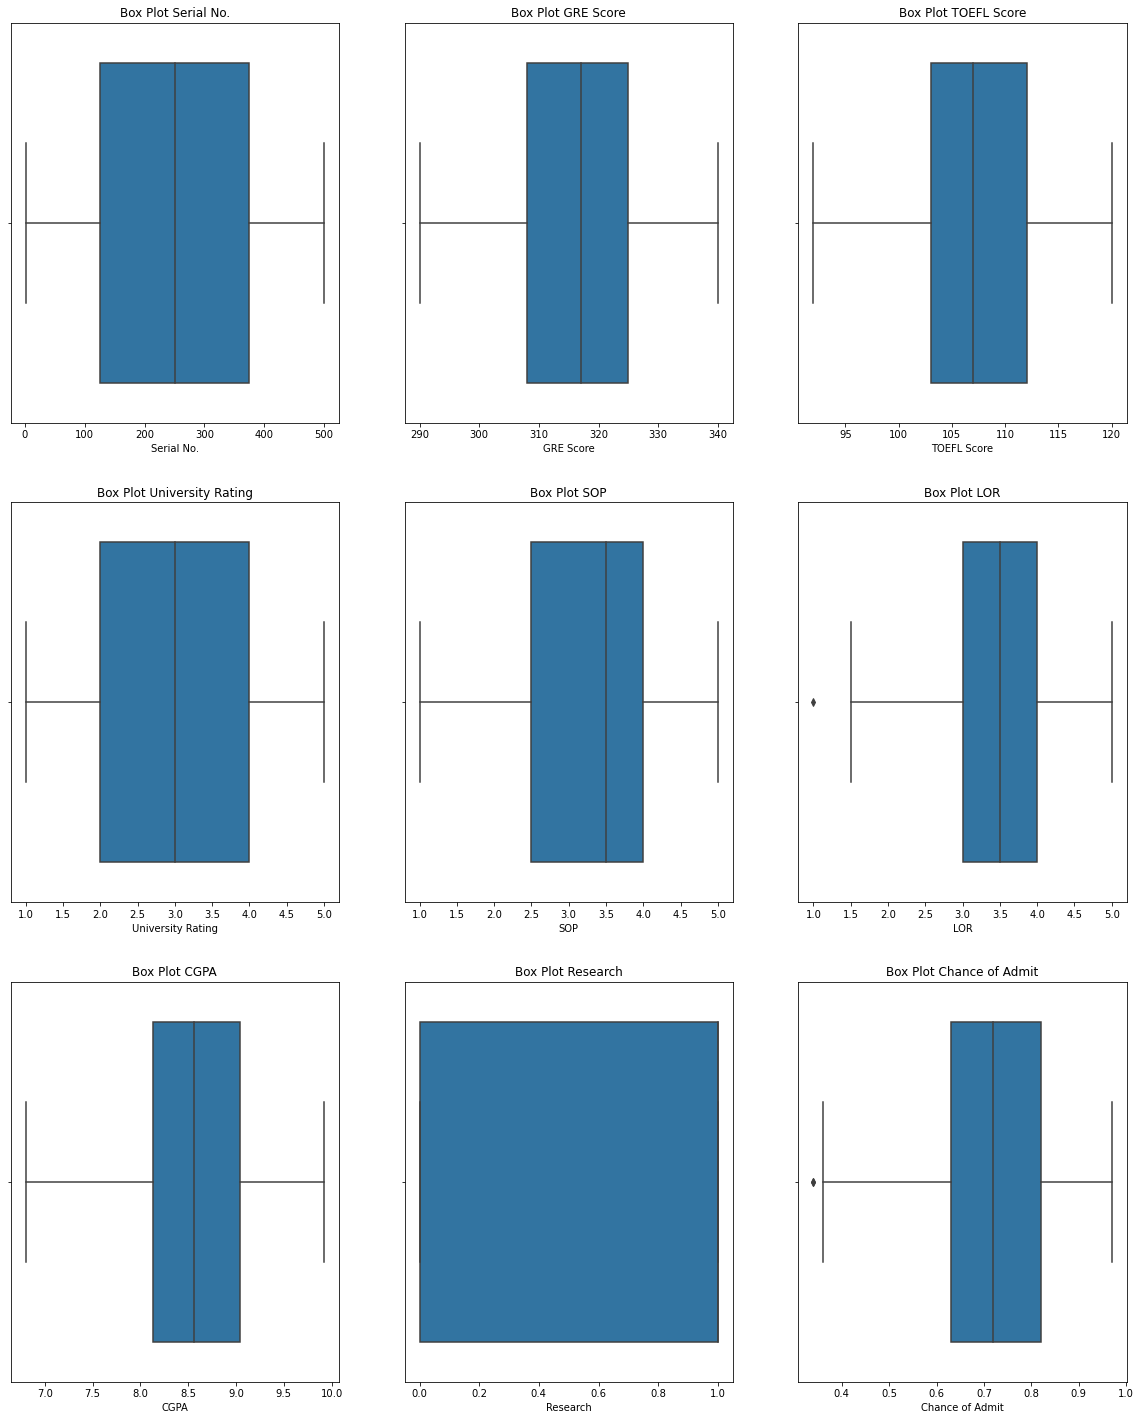

In [507]:
cols_ = data.columns 

fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(20, 25))
i = 0
j = 0
for col_name in cols_ :
    sns.boxplot(x= data[col_name], ax= axis[i,j])
    axis[i,j].set_title('Box Plot '+ col_name)
    if j != 2:
        j+=1 
    else:
        i += 1 
        j = 0
plt.show()

### Observation  :
- Data has 500 rows and 9 columns in total.
- For Column: Serial No.  Unique values: 500
- For Column: GRE Score  Unique values: 49
- For Column: TOEFL Score  Unique values: 29
- For Column: University Rating  Unique values: 5
- For Column: SOP  Unique values: 9
- For Column: LOR  Unique values: 9
- For Column: CGPA  Unique values: 184
- FOr Column: Research  Unique values: 2
- FOr Column: Chance of Admit  Unique values: 61
- No Null values in data 
- __Traget Column / Dependent Column : 'Chance of Admit'.__
- __Features / Independent Column : GRE Score,TOEFL Score,University Rating,,SOP,LOR,CGPA,Research.__
- Column Serial No.  is just Unique row ID and it will not affect in  'Chance of Admit' Column.(so dropping it)
- There is very few outliers in __LOR and Chance of Admit__ column.
- Categorical (numerical values) Column : 'University Rating', 'SOP', 'LOR', 'Research'
- Numerical Column : 'GRE Score', 'TOEFL Score', 'CGPA'

## 2. Correlation between all columns

In [508]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


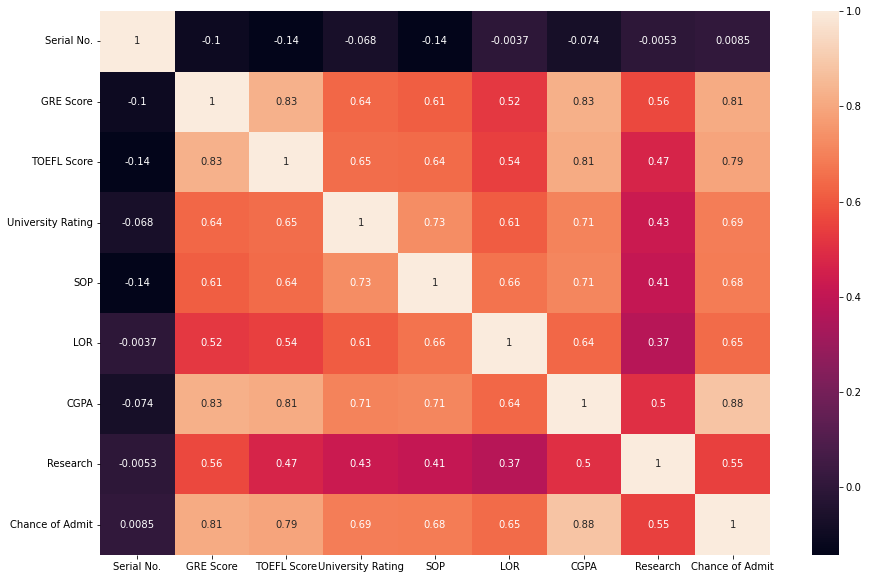

In [509]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

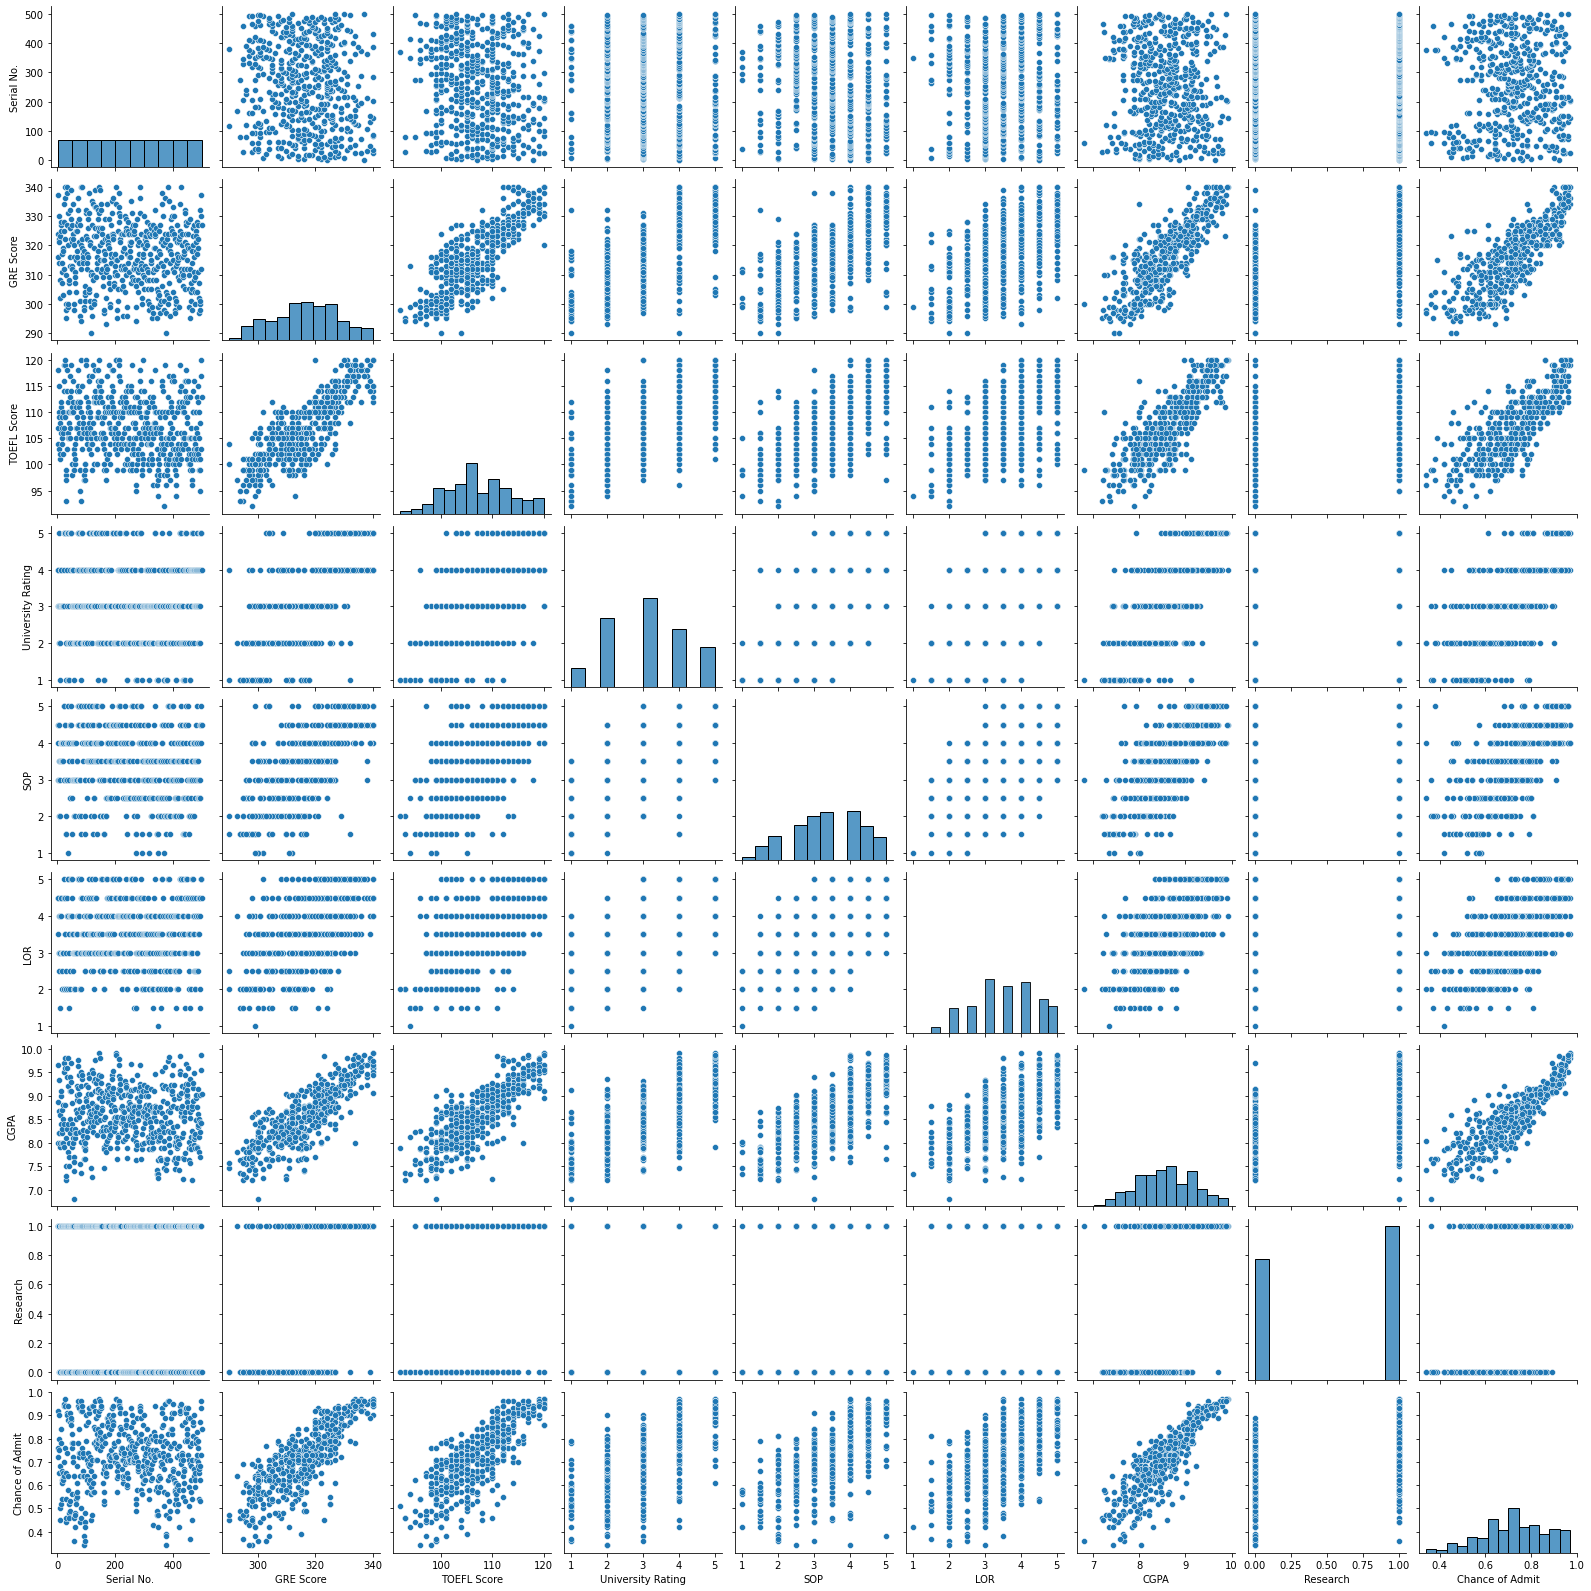

In [510]:
sns.pairplot(data)

### Observation :
- Seeing the heat map we can see that columns __GRE Score,TOEFL Score,University Rating,,SOP,LOR,CGPA,Research__ are correalted with __Chance of Admit__ column.
- CGPA Score being most correlated with target column.
- Serial No. has no correlation (least correlated) with target column. So will drop the column before creating model.
- Column __University Rating, SOP , LOR and Research__ are having categorical values (although numeric) but as each value in them gives correct weight to them so not doing any Target/One Hot encoding


## 3. Linear Regression  using Ordinary Least Squares regression (OLS)

In [511]:
y = data['Chance of Admit']
X = data.drop(['Chance of Admit','Serial No.'],axis=1)

- Droped Serial No column from feature column list as it is not needed (it is Unique row ID )

In [512]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


### 3.1 Feature Scaling 

In [513]:
# Only scaline numericla columns 

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [514]:
y.shape , X.shape

((500,), (500, 7))

In [515]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


In [516]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

### 3.2 Train_Test Split


In [517]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

### 3.3 Train Linear Regression Model  using Ordinary Least Squares regression (OLS)

In [518]:
X_train_1 = sm.add_constant(X_train)

ols_model_1 = sm.OLS(y_train, X_train_1).fit()
ols_model_1.summary()

E:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     275.2
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          5.29e-147
Time:                        22:21:03   Log-Likelihood:                 571.11
No. Observations:                 400   AIC:                            -1126.
Df Residuals:                     392   BIC:                            -1094.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3479      0.010     35.660      0.000       0.329       0.367
GRE Score             0.1122      0.028      4.010      0.000       0.057       0.167
TOEFL Score           0.0868      0.026      3.346      0.001       0.036       0.138
University Rating     0.0112      0.017      0.673      0.501      -0.022       0.044
SOP                   0.0013      0.020      0.067      0.947      -0.037       0.040
LOR                   0.0593      0.018      3.344      0.001       0.024       0.094
CGPA                  0.3685      0.033     11.307      0.000       0.304       0.433
Research              0.0248      0.007      3.485      0.001       0.011       0.039
==============================================================================
Omnibus:                       77.242   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.313
Skew:                          -1.035   Prob(JB):                     1.88e-34
Kurtosis:                       5.243   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Note :
__P>|t| is one of the most important statistics in the summary. It uses the t statistic to produce the p value, a measurement of how likely your coefficient is measured through our model by chance. The p value of SOP is 0.947 so there is a 94.7% chance the SOP variable has no affect on the dependent variable 'Chance of Admit' and our results are produced by chance.__



__Assuming aplha is 0.05 , Based on the P-values, the following feature SOP is removed__


In [519]:
X_train_2 = sm.add_constant(X_train[['GRE Score','TOEFL Score','University Rating','LOR','CGPA','Research']])

ols_model_2 = sm.OLS(y_train, X_train_2).fit()
ols_model_2.summary()

E:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     321.9
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          2.83e-148
Time:                        22:21:03   Log-Likelihood:                 571.11
No. Observations:                 400   AIC:                            -1128.
Df Residuals:                     393   BIC:                            -1100.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3480      0.010     35.776      0.000       0.329       0.367
GRE Score             0.1122      0.028      4.015      0.000       0.057       0.167
TOEFL Score           0.0869      0.026      3.360      0.001       0.036       0.138
University Rating     0.0116      0.016      0.737      0.462      -0.019       0.042
LOR                   0.0597      0.017      3.541      0.000       0.027       0.093
CGPA                  0.3689      0.032     11.579      0.000       0.306       0.432
Research              0.0248      0.007      3.494      0.001       0.011       0.039
==============================================================================
Omnibus:                       77.024   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.702
Skew:                          -1.033   Prob(JB):                     2.55e-34
Kurtosis:                       5.239   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Assuming aplha is 0.05 , Based on the P-values, the following feature University Ranting is removed__


In [520]:
X_train_3 = sm.add_constant(X_train[['GRE Score','TOEFL Score','LOR','CGPA','Research']])

ols_model_3 = sm.OLS(y_train, X_train_3).fit()
ols_model_3.summary()

E:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     386.6
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          1.79e-149
Time:                        22:21:03   Log-Likelihood:                 570.84
No. Observations:                 400   AIC:                            -1130.
Df Residuals:                     394   BIC:                            -1106.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3470      0.010     36.045      0.000       0.328       0.366
GRE Score       0.1132      0.028      4.058      0.000       0.058       0.168
TOEFL Score     0.0898      0.026      3.509      0.001       0.039       0.140
LOR             0.0631      0.016      3.898      0.000       0.031       0.095
CGPA            0.3737      0.031     11.987      0.000       0.312       0.435
Research        0.0251      0.007      3.544      0.000       0.011       0.039
==============================================================================
Omnibus:                       76.139   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.334
Skew:                          -1.023   Prob(JB):                     8.34e-34
Kurtosis:                       5.225   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation :
- Now that all p-values are almost zero , we can consider that the OLS model 3 as final model.
- Feature Columns in ols_model_3 are 'GRE Score','TOEFL Score','LOR','CGPA','Research'.
- R-square values of ols_model_3 is __0.831 (based on Training data)__
- Adj. R-squared value of ols_model_3 is __0.829  (based on Training data)__

### 3.4 Train Linear Regression Model  using Sklearn Library 

In [521]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [522]:
model.coef_

array([0.11221847, 0.08683655, 0.01120893, 0.00131847, 0.05931045,
       0.36849103, 0.02479131])

In [523]:
model1.intercept_

0.38718695347393206

In [524]:
model.score(X_train, y_train)

0.8309229292126588

In [525]:
# R2 Score 
model.score(X_test, y_test)

0.7787822431585507

In [526]:
print("MSE:",mean_squared_error(y_test,y_pred)) 

print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) 

print("MAE :",mean_absolute_error(y_test,y_pred) ) 

print("r2_score:",r2_score(y_test,model.predict(X_test))) 

MSE: 0.03001959062938167
RMSE: 0.17326162480301768
MAE : 0.1408915198383343
r2_score: 0.7787822431585507


#### Observation :-
__Using sklearn Linear Regression model below are the observation__
- MSE is 0.03001959062938167
- RMSE is  0.17326162480301768
- MAE is 0.1408915198383343
- r2_score is  0.7787822431585507

## 4. Validate Linear Regression Assumptions¶
- Multicolillinearity check
- Normality of residuals
- Mean of residuals
- Linearity of variables
- Test for Homoscedasticity


### 4.1 Multcollinearity check by VIF score
- if the VIF score is greater than 10, it indicates high multicollinearity between that feature and the other independent variables. 


In [527]:
def getVIF(X_train):
    vif_data = pd.DataFrame()
    X = X_train
    vif_data['Features'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_data = vif_data.sort_values(by = "VIF", ascending = False)
    
    return(vif_data)

In [528]:
getVIF(X_train_3)

,Features,VIF
0,const,10.824949
1,GRE Score,4.615125
4,CGPA,4.345714
2,TOEFL Score,3.670681
3,LOR,1.637913
5,Research,1.446352


#### Observation :
-All VIF scores are below 5, indicating no multicollinearity.

### 4.2 Normality of residual 


In [529]:
residuals = ols_model_3.resid
residuals

199   -0.008734
450    0.013916
231    0.050448
95    -0.132552
54     0.039695
         ...   
98    -0.001211
476    0.028975
322    0.047197
382   -0.015579
365    0.011393
Length: 400, dtype: float64

In [530]:
# Instead of above we can use this error also (same thing)
y_predict = ols_model_3.predict(X_train_3)
error =  y_train - y_predict
error

199   -0.008734
450    0.013916
231    0.050448
95    -0.132552
54     0.039695
         ...   
98    -0.001211
476    0.028975
322    0.047197
382   -0.015579
365    0.011393
Length: 400, dtype: float64

<AxesSubplot:ylabel='Count'>

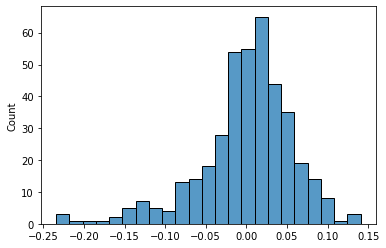

In [531]:
import seaborn as sns

sns.histplot(error)

E:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


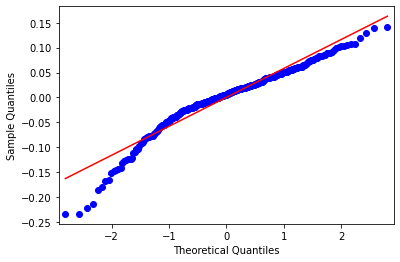

In [532]:
sm.qqplot(residuals, line = 's')
plt.show()

#### Observation :
- The residual terms are pretty much normally distributed for the number of test points we took. 
- NOTE : the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. ( It's very difficult to get perfect curves, distributions in real life data )

### 4.3 Mean of residuals

E:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


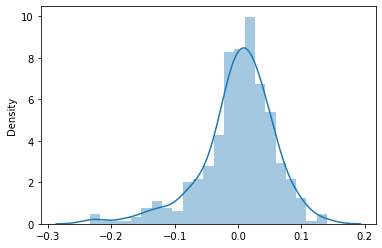

In [533]:
sns.distplot(residuals)
plt.show()

In [534]:
abs(residuals.mean())

1.2281842209915794e-16

#### Observation
- The model's mean of residuals is 1.2281842209915794e-16 (almost zero ) which indicates it is a good estimator.

### 4.4 Linearity of variables
- Linear regression needs the relationship between the independent and dependent variables to be linear. 

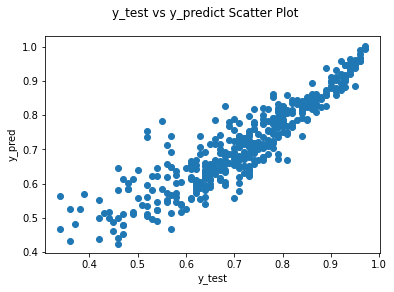

In [535]:
fig = plt.figure()
plt.scatter(y_train,y_predict)
fig.suptitle('y_test vs y_predict Scatter Plot ')              
plt.xlabel('y_test')                        
plt.ylabel('y_pred')  
plt.show()

#### Observation :
- The relationship between the predicted and actual values forms a clear linear pattern, it suggests that the model captures the linear relationship between the independent and dependent variables well.

### 4.5 No Hetroskedasticity / Homoscedasticity Test
- Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

Text(0.5, 1.0, 'Predicted values vs Residuals')

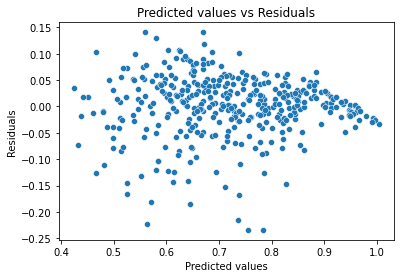

In [536]:
sns.scatterplot(x=y_predict ,y=error)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

In [537]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity 

# Null Hypothesis: Heteroscedasticity is not present.
# Alternate Hypothesis: Heteroscedasticity is present.
    
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

X_train_3.drop('const',axis =1,inplace= True )
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_train_3)
lzip(name, test)

[('F statistic', 1.0300891783749506), ('p-value', 0.4181148074407516)]

In [538]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
199,0.46,0.535714,0.50,0.750,0.875,0.605769,0.0
450,0.60,0.714286,0.75,0.500,0.875,0.660256,1.0
231,0.58,0.500000,0.50,0.625,0.375,0.490385,1.0
95,0.28,0.285714,0.75,0.125,0.375,0.333333,0.0
54,0.64,0.642857,0.50,0.500,0.625,0.384615,0.0
...,...,...,...,...,...,...,...
98,0.84,0.964286,0.75,1.000,0.875,0.782051,1.0
476,0.28,0.428571,0.50,0.375,0.250,0.423077,0.0
322,0.48,0.535714,0.25,0.375,0.750,0.471154,0.0
382,0.68,0.642857,0.75,0.875,0.750,0.753205,1.0


#### Observation  
- As p > 0.05 We accept Null Hypothesis so Heteroscedasticity is not present.

## 5. Checking the model performance for unseen data (Test Data)

In [539]:
X_test = X_test[X_train_3.columns]
X_test

,GRE Score,TOEFL Score,LOR,CGPA,Research
229,0.68,0.678571,0.500,0.708333,1.0
337,0.84,0.928571,1.000,0.855769,1.0
327,0.10,0.321429,0.250,0.339744,0.0
416,0.50,0.428571,0.375,0.416667,0.0
306,0.66,0.642857,0.625,0.737179,1.0
...,...,...,...,...,...
252,0.56,0.285714,0.625,0.557692,1.0
102,0.48,0.500000,0.625,0.464744,0.0
261,0.44,0.428571,0.750,0.413462,0.0
351,0.70,0.642857,0.750,0.599359,1.0


In [540]:
m, d = X_test.shape
m ,d 

(100, 5)

In [541]:
X_test = sm.add_constant(X_test)

y_test_pred = ols_model_3.predict(X_test)
y_test_pred

E:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


229    0.806239
337    0.933443
327    0.529887
416    0.621425
306    0.819438
         ...   
252    0.708984
102    0.659314
261    0.637097
351    0.780348
461    0.604128
Length: 100, dtype: float64

In [543]:
# Finding Various Model Metrics for Test Data

In [542]:
r2  = r2_score(y_test,y_test_pred)
mae = mean_absolute_error(y_test,y_test_pred)
mse = mean_squared_error( y_test, y_test_pred )
rmse = np.sqrt(mse)

temp = (1 - r2)*(m - 1)/(m-d-1)
adj_r2 = 1 - temp

print(f"R2 Score = {r2} \nAdjusted R2 Score = {adj_r2} \nMAE = {mae} \nMSE = {mse} \nRMSE = {rmse}")

R2 Score = 0.7753484311108387 
Adjusted R2 Score = 0.7633988795741812 
MAE = 0.045130219746924265 
MSE = 0.004406717998500321 
RMSE = 0.06638311531180441


### Observation for OLS Model :-
- R2 score of is 0.77 and Adj R2 is 0.76
- Error :  MAE = 0.045130219746924265 ,MSE = 0.004406717998500321  , RMSE = 0.06638311531180441 is very less .


## Inferences and Recommendations :

### Basic EDA  : 
- Data has 500 rows and 9 columns in total.
- For Column: Serial No.  Unique values: 500
- For Column: GRE Score  Unique values: 49
- For Column: TOEFL Score  Unique values: 29
- For Column: University Rating  Unique values: 5
- For Column: SOP  Unique values: 9
- For Column: LOR  Unique values: 9
- For Column: CGPA  Unique values: 184
- FOr Column: Research  Unique values: 2
- FOr Column: Chance of Admit  Unique values: 61
- No Null values in data 
- __Traget Column / Dependent Column : 'Chance of Admit'.__
- __Features / Independent Column : GRE Score,TOEFL Score,University Rating,,SOP,LOR,CGPA,Research.__
- Column Serial No.  is just Unique row ID and it will not affect in  'Chance of Admit' Column.(so dropping it)
- There is very few outliers in __LOR and Chance of Admit__ column.
- Categorical (numerical values) Column : 'University Rating', 'SOP', 'LOR', 'Research'
- Numerical Column : 'GRE Score', 'TOEFL Score', 'CGPA'

### Correlation Observation 
- Seeing the heat map we can see that columns __GRE Score,TOEFL Score,University Rating,,SOP,LOR,CGPA,Research__ are correalted with __Chance of Admit__ column.
- CGPA Score being most correlated with target column.
- Serial No. has no correlation (least correlated) with target column. So will drop the column before creating model.
- Column __University Rating, SOP , LOR and Research__ are having categorical values (although numeric) but as each value in them gives correct weight to them so not doing any Target/One Hot encoding

### Linear Regression using statsmodels (OLS model) - Training Data
- We can consider that the OLS model 3 as final model.
- Feature Columns in ols_model_3 are 'GRE Score','TOEFL Score','LOR','CGPA','Research'.
- R-square values of ols_model_3 is __0.831 (based on Training data)__
- Adj. R-squared value of ols_model_3 is __0.829  (based on Training data)__

### Linear Regression using statsmodels (OLS model) - Test Data
- R2 score of is 0.77 and Adj R2 is 0.76
- Error :  MAE = 0.045130219746924265 ,MSE = 0.004406717998500321  , RMSE = 0.06638311531180441 is very less .

### All Assumptions  of Linear Regression fulfilled 
- All VIF scores are below 5, indicating no multicollinearity between that feature and the other independent variables.
- The residual terms are pretty much normally distributed for the number of test points we took.
- The model's mean of residuals is 1.2281842209915794e-16 (almost zero ) which indicates it is a good estimator.
- The relationship between the predicted and actual values forms a clear linear pattern, it suggests that the model captures the linear relationship between the independent and dependent variables well.
- No Heteroscedasticity is not present ( Performed the Goldfeld-Quandt test)

### Recommendations
- High value of 'GRE Score','TOEFL Score','LOR','CGPA','Research' will increase the Chance of Admission  for student
- CGPA being most correlated with target column follwed by GRE Score  and TOFL score. So if a student improves their score in these  3 columns then thier chances of admission increases . To imporve their chances of admission they can further imporve thier scores in LOR and do Reseach .
- r2_score of 0.77 with only 500 records is a Good Model. Model will perform better if we have more number of records and r2_score will increase based on that.
- Error values (MSE , MAE and RMSE) are all very less indicating the model is a good estimator.
